In [1]:
import numpy as np
import pandas as pd
# import scanpy.api as sc
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.facecolor'] = (1,1,1,1)
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, color_map='viridis', transparent=False, frameon=False)  # low dpi (dots per inch) yields small inline figures


In [2]:
annot = sc.queries.biomart_annotations(
        "hsapiens",
        ['hgnc_symbol', "ensembl_gene_id"],
    )
annot = annot.drop_duplicates(subset='hgnc_symbol').drop_duplicates(subset='ensembl_gene_id').set_index("ensembl_gene_id")

In [3]:
def preprocess(adata, hv=True):
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)
    if hv:
        sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
    adata.raw = adata
    if hv:
        adata = adata[:, adata.var.highly_variable]
    sc.pp.scale(adata, max_value=10)
    return adata

In [4]:
adata_ref1 = sc.datasets.ebi_expression_atlas("E-MTAB-9221")

adata_ref1.var[annot.columns] = annot.reindex(adata_ref1.var.index)
adata_ref1.var[annot.columns] = annot.reindex(adata_ref1.var.index)
adata_ref1.var.index = adata_ref1.var['hgnc_symbol']
adata_ref1 = adata_ref1[:,~adata_ref1.var.index.isna()]

adata_ref1 = preprocess(adata_ref1)
# sc.pp.neighbors(adata_ref1, n_neighbors=10, n_pcs=40)
# sc.tl.umap(adata_ref1)
adata_ref1

/home/yyasumizu/anaconda3/envs/scanpy1.7.2/lib/python3.7/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
/home/yyasumizu/anaconda3/envs/scanpy1.7.2/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:845: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


AnnData object with n_obs × n_vars = 6178 × 4281
    obs: 'Sample Characteristic[organism]', 'Sample Characteristic Ontology Term[organism]', 'Sample Characteristic[developmental stage]', 'Sample Characteristic Ontology Term[developmental stage]', 'Sample Characteristic[sex]', 'Sample Characteristic Ontology Term[sex]', 'Sample Characteristic[age]', 'Sample Characteristic Ontology Term[age]', 'Sample Characteristic[individual]', 'Sample Characteristic Ontology Term[individual]', 'Sample Characteristic[disease]', 'Sample Characteristic Ontology Term[disease]', 'Sample Characteristic[clinical history]', 'Sample Characteristic Ontology Term[clinical history]', 'Sample Characteristic[organism part]', 'Sample Characteristic Ontology Term[organism part]', 'Factor Value[disease]', 'Factor Value Ontology Term[disease]', 'Factor Value[clinical history]', 'Factor Value Ontology Term[clinical history]', 'Factor Value[sampling time point]', 'Factor Value Ontology Term[sampling time point]', 'Facto

In [5]:
adata_ref2 = sc.datasets.ebi_expression_atlas("E-GEOD-106540")

adata_ref2.var[annot.columns] = annot.reindex(adata_ref2.var.index)
adata_ref2.var[annot.columns] = annot.reindex(adata_ref2.var.index)
adata_ref2.var.index = adata_ref2.var['hgnc_symbol']
adata_ref2 = adata_ref2[:,~adata_ref2.var.index.isna()]
adata_ref2 = preprocess(adata_ref2, hv=False)

adata_ref2

normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


AnnData object with n_obs × n_vars = 2244 × 20606
    obs: 'Sample Characteristic[organism]', 'Sample Characteristic Ontology Term[organism]', 'Sample Characteristic[individual]', 'Sample Characteristic Ontology Term[individual]', 'Sample Characteristic[geographical location]', 'Sample Characteristic Ontology Term[geographical location]', 'Sample Characteristic[organism part]', 'Sample Characteristic Ontology Term[organism part]', 'Sample Characteristic[cell type]', 'Sample Characteristic Ontology Term[cell type]', 'Sample Characteristic[disease]', 'Sample Characteristic Ontology Term[disease]', 'Sample Characteristic[clinical information]', 'Sample Characteristic Ontology Term[clinical information]', 'Sample Characteristic[genotype]', 'Sample Characteristic Ontology Term[genotype]', 'Sample Characteristic[cell subtype]', 'Sample Characteristic Ontology Term[cell subtype]', 'Sample Characteristic[cell subtype surface markers]', 'Sample Characteristic Ontology Term[cell subtype surface 

In [6]:
adata_ref3 = sc.datasets.pbmc3k()
adata_ref3 = preprocess(adata_ref3, hv=False)

normalizing counts per cell
    finished (0:00:00)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


In [7]:
adata_ref = adata_ref1.concatenate(adata_ref2, adata_ref3, batch_categories=['ref1', 'ref2', 'ref3'])
sc.tl.pca(adata_ref)

computing PCA
    with n_comps=50
    finished (0:00:03)


computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:24)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)
... storing 'Sample Characteristic[organism]' as categorical
... storing 'Sample Characteristic Ontology Term[organism]' as categorical
... storing 'Sample Characteristic[developmental stage]' as categorical
... storing 'Sample Characteristic Ontology Term[developmental stage]' as categorical
... storing 'Sample Characteristic[sex]' as categorical
... storing 'Sample Characteristic Ontology Term[sex]' as categorical
... storing 'Sample Characteristic[age]' as categorical
... storing 'Sample Characteristic[individual]' as categorical
... storing 'Sample Characteristic[disease]' as categorical
... storing 'Sample Characteristic Ontology Term[disease]' as categorical
... storing

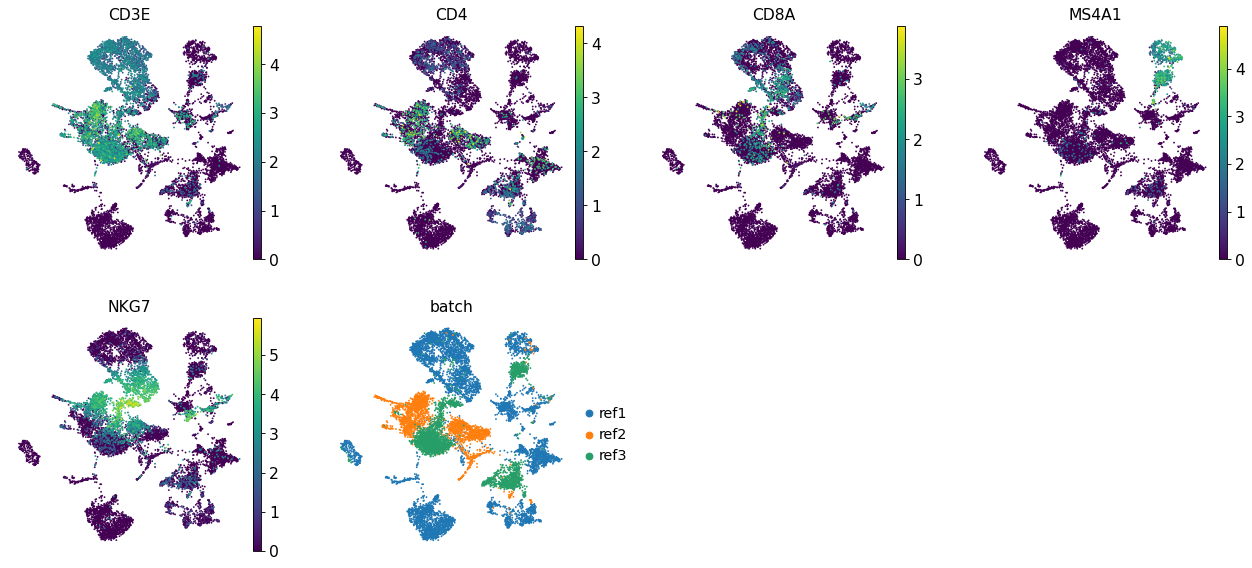

In [8]:
sc.pp.neighbors(adata_ref)
sc.tl.umap(adata_ref)

sc.pl.umap(adata_ref, color=['CD3E', 'CD4', 'CD8A', 'MS4A1', 'NKG7', 'batch'])

computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:05)
running Leiden clustering
    finished: found 16 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


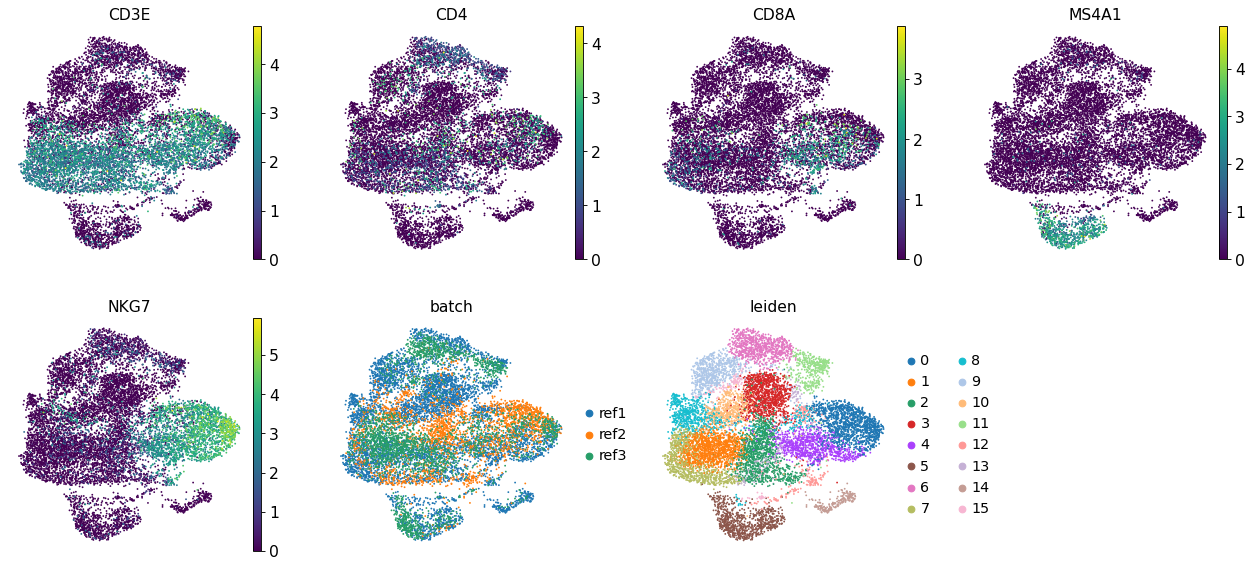

In [9]:
sc.external.pp.bbknn(adata_ref, batch_key='batch')
sc.tl.umap(adata_ref)
sc.tl.leiden(adata_ref)

sc.pl.umap(adata_ref, color=['CD3E', 'CD4', 'CD8A', 'MS4A1', 'NKG7', 'batch', 'leiden'])

In [10]:
adata = sc.datasets.pbmc3k_processed()

In [11]:
var_names = adata_ref.var_names.intersection(adata.var_names)
adata_ref = adata_ref[:, var_names]
adata = adata[:, var_names]

In [12]:
adata_ref.uns['neighbors']['params']['metric'] = 'euclidean'
sc.tl.ingest(adata, adata_ref, obs='leiden')

running ingest
    finished (0:00:07)


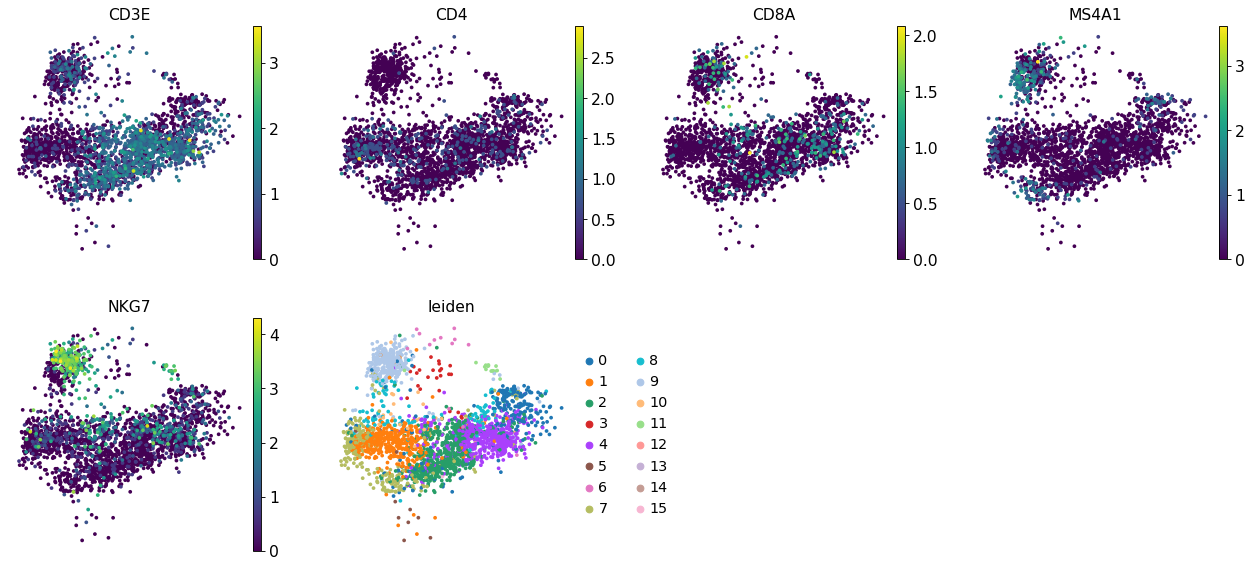

In [13]:
sc.pl.umap(adata, color=['CD3E', 'CD4', 'CD8A', 'MS4A1', 'NKG7', 'leiden', ])

In [14]:
adata_concat = adata_ref.concatenate(adata, batch_categories=['ref', 'new'])
adata_concat.obs.leiden = adata_concat.obs.leiden.astype('category')
adata_concat.obs.leiden.cat.reorder_categories(adata_ref.obs.leiden.cat.categories, inplace=True)  # fix category ordering
adata_concat.uns['leiden_colors'] = adata_ref.uns['leiden_colors']  # fix category colors

... storing 'Sample Characteristic[organism]' as categorical
... storing 'Sample Characteristic Ontology Term[organism]' as categorical
... storing 'Sample Characteristic[developmental stage]' as categorical
... storing 'Sample Characteristic Ontology Term[developmental stage]' as categorical
... storing 'Sample Characteristic[sex]' as categorical
... storing 'Sample Characteristic Ontology Term[sex]' as categorical
... storing 'Sample Characteristic[age]' as categorical
... storing 'Sample Characteristic[individual]' as categorical
... storing 'Sample Characteristic[disease]' as categorical
... storing 'Sample Characteristic Ontology Term[disease]' as categorical
... storing 'Sample Characteristic[clinical history]' as categorical
... storing 'Sample Characteristic[organism part]' as categorical
... storing 'Sample Characteristic Ontology Term[organism part]' as categorical
... storing 'Factor Value[disease]' as categorical
... storing 'Factor Value Ontology Term[disease]' as categori

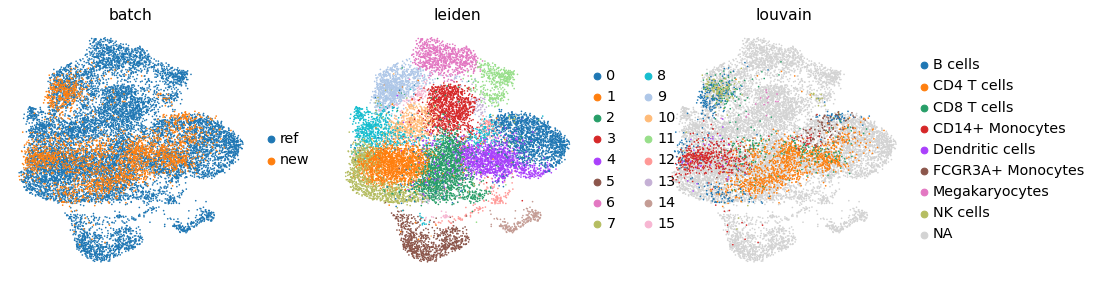

In [15]:
sc.pl.umap(adata_concat, color=['batch', 'leiden', 'louvain'])

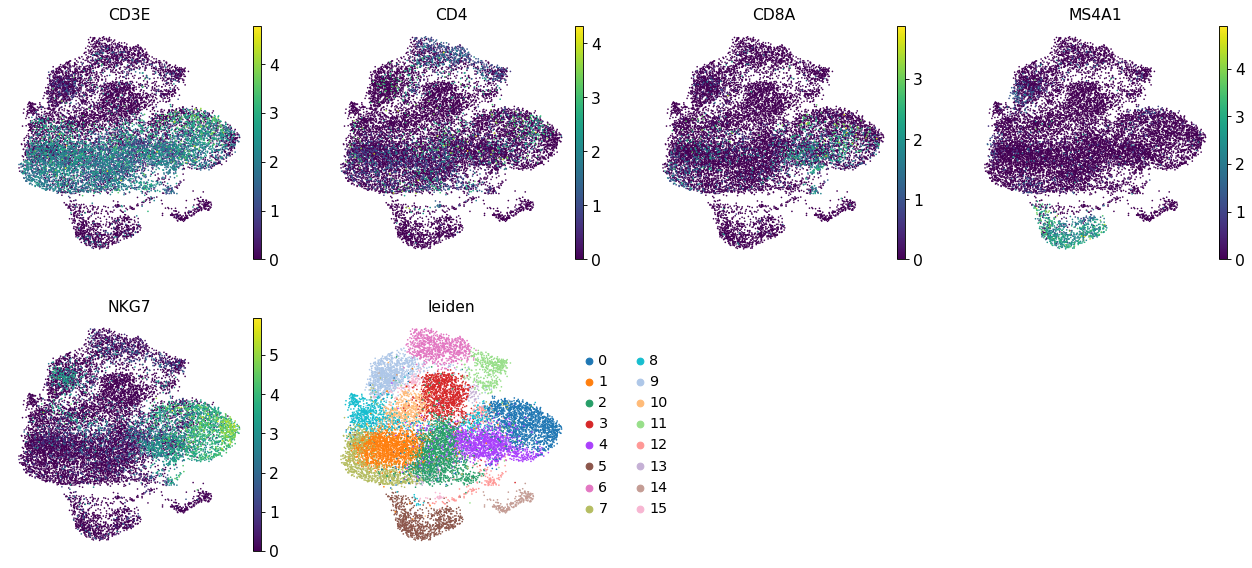

In [16]:
sc.pl.umap(adata_concat, color=['CD3E', 'CD4', 'CD8A', 'MS4A1', 'NKG7', 'leiden'])

In [17]:
adata_concat = adata_ref1.concatenate(adata_ref2, adata_ref3, adata, batch_categories=['ref1', 'ref2', 'ref3', 'new'])
sc.tl.pca(adata_concat)

computing PCA
    with n_comps=50
    finished (0:00:01)


computing batch balanced neighbors
	finished: added to `.uns['neighbors']`
	`.obsp['distances']`, distances for each pair of neighbors
	`.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:07)
running Leiden clustering
    finished: found 12 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:01)
... storing 'Sample Characteristic[organism]' as categorical
... storing 'Sample Characteristic Ontology Term[organism]' as categorical
... storing 'Sample Characteristic[developmental stage]' as categorical
... storing 'Sample Characteristic Ontology Term[developmental stage]' as categorical
... storing 'Sample Characteristic[sex]' as categorical
... storing 'Sample Characteristic Ontology Term[sex]' as categorical
... storing 'Sample Characteristic[age]' as categorical
... storing 'Sample Characteristic[individual]' as categorical
... storing 'Sample Characteristic[di

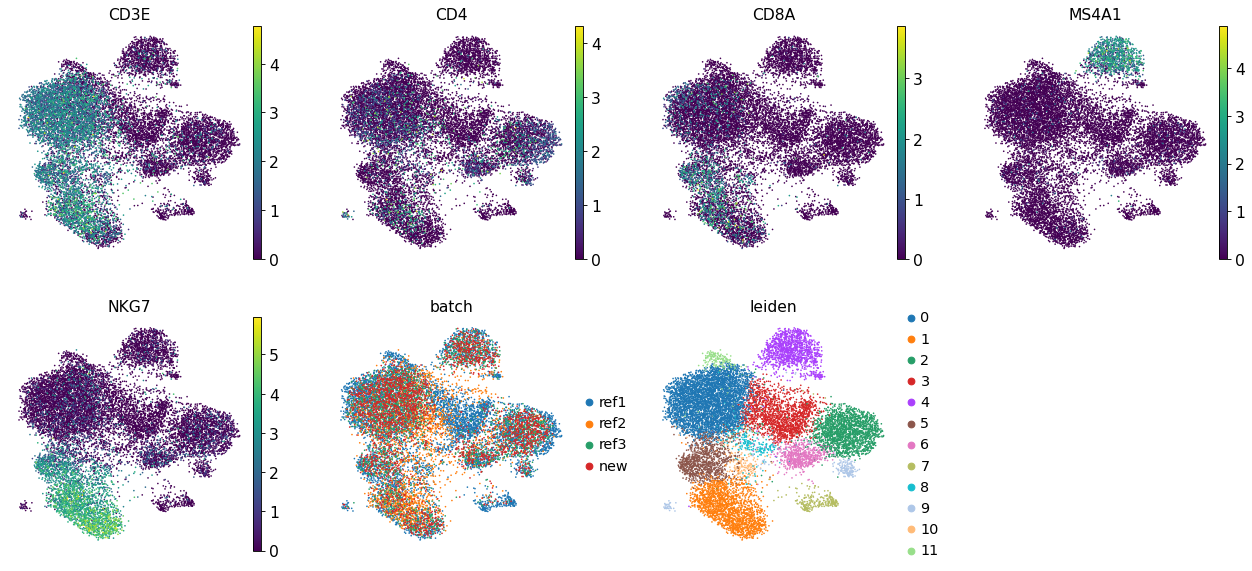

In [18]:
sc.external.pp.bbknn(adata_concat, batch_key='batch')
sc.tl.umap(adata_concat)
sc.tl.leiden(adata_concat)

sc.pl.umap(adata_concat, color=['CD3E', 'CD4', 'CD8A', 'MS4A1', 'NKG7', 'batch', 'leiden'])

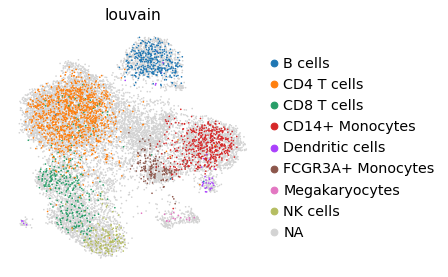

In [19]:
sc.pl.umap(adata_concat, color=['louvain'])